In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
resource = pd.read_csv('adc-word.csv')
sentences_train, sentences_test, y_train_data, y_test = train_test_split(resource['documents'], resource['category'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
vectorizer.fit(resource['documents'])
text_vector_train = vectorizer.fit_transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [3]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(text_vector_train, y_train_data.ravel())

In [4]:
X_train.shape, X_test.shape

((159712, 765127), (13548, 765127))

In [5]:
classification = LinearSVC()
classification.fit(X_train, y_train)
predicted = classification.predict(X_test)
print(metrics.classification_report(y_test, predicted))
cm = confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4926
           1       0.80      0.81      0.80      3215
           2       0.82      0.80      0.81      3147
           3       0.95      0.96      0.95       766
           4       0.96      0.95      0.96       631
           5       0.29      0.30      0.30       435
           6       0.66      0.75      0.70       313
           7       0.42      0.84      0.56       115

    accuracy                           0.78     13548
   macro avg       0.71      0.77      0.73     13548
weighted avg       0.79      0.78      0.78     13548



/Users/michaelmelese/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, predicted))

Accuracy :  0.7824771183938589


In [6]:
print(cm)

[[3673  449  348   41   14  304   51   46]
 [ 414 2594  144    1    5    7   10   40]
 [ 349  182 2532    0    3    4   43   34]
 [  18    2    1  739    0    0    1    5]
 [  21    2    0    1  601    1    1    4]
 [ 263    7   13    0    1  131   15    5]
 [  36    5   34    0    0    3  234    1]
 [   8    7    3    0    0    0    0   97]]


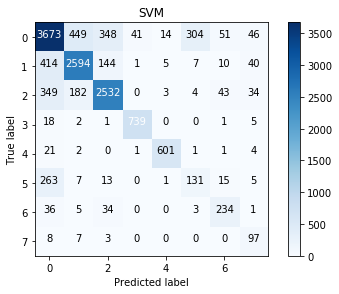

In [7]:
import matplotlib.pyplot as plt
import itertools
cmap = plt.cm.Blues
title = "SVM"
classes = 8
normalize = False
tick_marks = np.arange(classes)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(10)
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 5.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()